<a href="https://colab.research.google.com/github/vinodskariya/shared_work/blob/main/Copy_of_layoff_analysis2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAD LIBRARIES

Data set updated can be found here for download

In [3]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


LOAD DATA FROM FILE TO GOOGLE COLAB

In [10]:
from google.colab import files
uploaded = files.upload()

Saving layoffs.csv to layoffs.csv


LOAD DATA INTO PANDAS DATA FRAME

In [11]:
import io
df = pd.read_csv(io.StringIO(uploaded['layoffs.csv'].decode('latin-1')))

In [12]:
df

,company,location,industry,total_laid_off,percentage,date,funds_raised,stage,country
0,Veev,SF Bay Area,Real Estate,100.0,0.30,2022-11-11,597.0,Series D,United States
1,GoTo Group,Jakarta,Transportation,1000.0,0.10,2022-11-10,1300.0,Unknown,Indonesia
2,Juul,SF Bay Area,Consumer,400.0,0.30,2022-11-10,1500.0,Unknown,United States
3,InfluxData,SF Bay Area,NaN,65.0,0.27,2022-11-10,119.0,Series D,United States
4,Coinbase,SF Bay Area,Crypto,60.0,NaN,2022-11-10,549.0,IPO,United States
...,...,...,...,...,...,...,...,...,...
1569,Service,Los Angeles,Travel,NaN,1.00,2020-03-16,5.1,Seed,United States
1570,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,45.0,Unknown,United States
1571,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,1.0,Seed,United States
1572,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,90.0,Series C,United States


INVESTIGATE DATA

In [13]:
df.shape

(1574, 9)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1574 entries, 0 to 1573
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   company         1574 non-null   object 
 1   location        1574 non-null   object 
 2   industry        1571 non-null   object 
 3   total_laid_off  1132 non-null   float64
 4   percentage      1053 non-null   float64
 5   date            1574 non-null   object 
 6   funds_raised    1472 non-null   float64
 7   stage           1570 non-null   object 
 8   country         1574 non-null   object 
dtypes: float64(3), object(6)
memory usage: 110.8+ KB


In [15]:
df['country'].unique()

array(['United States', 'Indonesia', 'India', 'Sweden', 'Greece',
       'Brazil', 'Poland', 'Germany', 'Israel', 'Seychelles', 'Norway',
       'Canada', 'United Kingdom', 'Belgium', 'Argentina', 'Netherlands',
       'Denmark', 'Hong Kong', 'Singapore', 'New Zealand', 'Australia',
       'Malaysia', 'Hungary', 'Vietnam', 'Egypt', 'Austria', 'Thailand',
       'Romania', 'Lithuania', 'Nigeria', 'Kenya', 'Chile', 'Luxembourg',
       'China', 'Senegal', 'Pakistan', 'United Arab Emirates', 'Colombia',
       'Finland', 'Peru', 'Ireland', 'Bahrain', 'Mexico', 'Turkey',
       'Russia', 'Uruguay', 'Bulgaria', 'France', 'Switzerland',
       'Estonia', 'Portugal', 'South Africa', 'Czech Republic', 'Myanmar'],
      dtype=object)

In [16]:
df['industry'].unique()

array(['Real Estate', 'Transportation', 'Consumer', nan, 'Crypto',
       'Other', 'Marketing', 'Education', 'Logistics', 'HR', 'Finance',
       'Healthcare', 'Media', 'Aerospace', 'Sales', 'Support', 'Security',
       'Data', 'Retail', 'Food', 'Travel', 'Recruiting', 'Legal',
       'Construction', 'Fitness', 'Product', 'Energy', 'Infrastructure'],
      dtype=object)

In [17]:
df.isna().sum()

company             0
location            0
industry            3
total_laid_off    442
percentage        521
date                0
funds_raised      102
stage               4
country             0
dtype: int64

In [18]:
df.isna().sum()*100/(len(df))

company            0.000000
location           0.000000
industry           0.190597
total_laid_off    28.081321
percentage        33.100381
date               0.000000
funds_raised       6.480305
stage              0.254130
country            0.000000
dtype: float64

DATA PREPERATION:

In [19]:
#Fix date type
df["date"] = df["date"].astype('datetime64[ns]')

In [20]:
#Remove rows where there's no data for total laid off
df1 = df.dropna(subset=['total_laid_off'])

In [21]:
df1.isna().sum()

company             0
location            0
industry            3
total_laid_off      0
percentage        291
date                0
funds_raised       65
stage               1
country             0
dtype: int64

In [22]:
df1.shape

(1132, 9)

In [23]:
# Find duplicates in the data set
df1[df1.duplicated()]

,company,location,industry,total_laid_off,percentage,date,funds_raised,stage,country
721,Cazoo,London,Transportation,750.0,0.15,2022-06-07,2000.0,IPO,United Kingdom


In [24]:
 # Drop Duplicates
df1 = df1.drop_duplicates()

In [25]:
df1.shape

(1131, 9)

In [26]:
df1

,company,location,industry,total_laid_off,percentage,date,funds_raised,stage,country
0,Veev,SF Bay Area,Real Estate,100.0,0.30,2022-11-11,597.0,Series D,United States
1,GoTo Group,Jakarta,Transportation,1000.0,0.10,2022-11-10,1300.0,Unknown,Indonesia
2,Juul,SF Bay Area,Consumer,400.0,0.30,2022-11-10,1500.0,Unknown,United States
3,InfluxData,SF Bay Area,NaN,65.0,0.27,2022-11-10,119.0,Series D,United States
4,Coinbase,SF Bay Area,Crypto,60.0,NaN,2022-11-10,549.0,IPO,United States
...,...,...,...,...,...,...,...,...,...
1568,Help.com,Austin,Support,16.0,1.00,2020-03-16,6.0,Seed,United States
1570,HopSkipDrive,Los Angeles,Transportation,8.0,0.10,2020-03-13,45.0,Unknown,United States
1571,Panda Squad,SF Bay Area,Consumer,6.0,0.75,2020-03-13,1.0,Seed,United States
1572,Tamara Mellon,Los Angeles,Retail,20.0,0.40,2020-03-12,90.0,Series C,United States


VISUALIZATIONS

In [ ]:
fig = px.bar(df1, x="country", y="total_laid_off")
fig.show()

In [ ]:
fig = px.bar(df1, x="total_laid_off", y="industry")
fig.show()

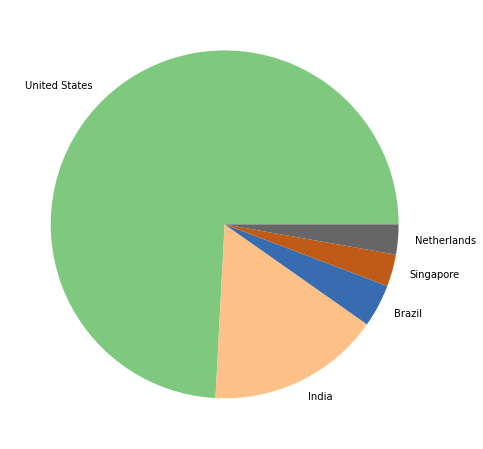

In [ ]:
df1.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="", figsize=(8,8), kind='pie', stacked=True, colormap='Accent')

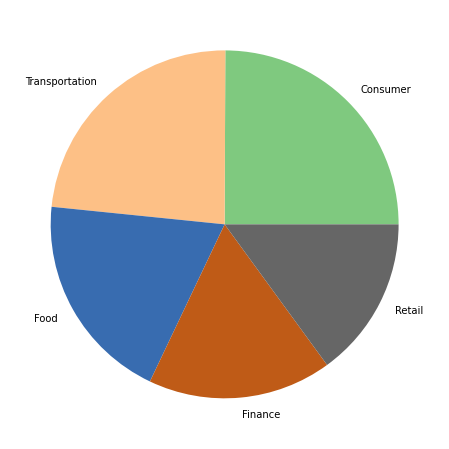

In [ ]:
df1.groupby('industry')['total_laid_off'].sum().sort_values(ascending=False).head().plot(ylabel="", figsize=(8,8), kind='pie', stacked=True, colormap='Accent')

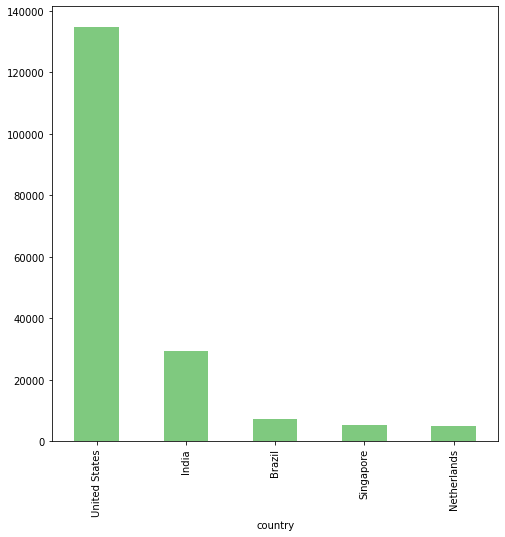

In [28]:
df1.groupby('country')['total_laid_off'].sum().sort_values(ascending=False).head(5).plot(ylabel="", figsize=(8,8), kind='bar', stacked=True, colormap='Accent')

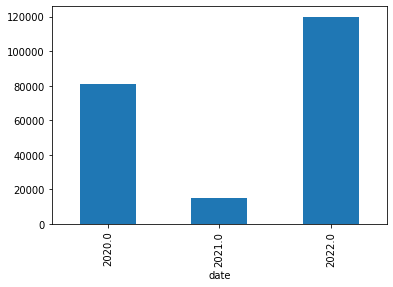

In [ ]:
df1.groupby(pd.to_datetime(df['date']).dt.year)['total_laid_off'].sum().plot( kind='bar', stacked=True)

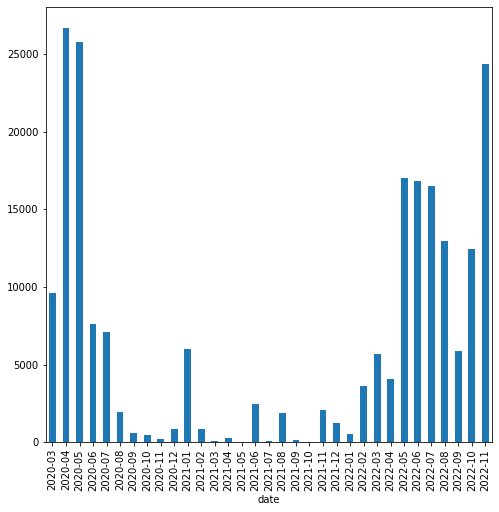

In [ ]:
df.groupby(df['date'].dt.to_period('M'))['total_laid_off'].sum().plot( kind='bar', stacked=True, figsize=(8,8))



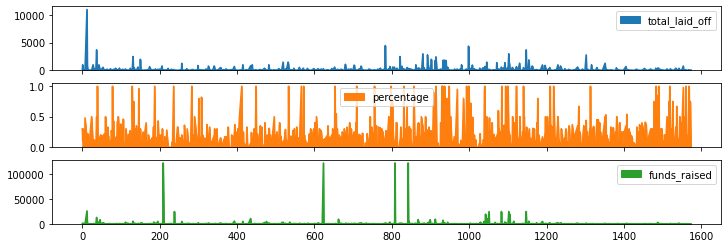

In [ ]:
axs = df1.plot.area(figsize=(12, 4), subplots=True)

plt.show()

In [ ]:
# Companies with multiple layoffs
df1.groupby('company')['date'].count().sort_values(ascending=False).head(10)

company
Uber          5
Loft          4
Shopify       4
Patreon       4
Gopuff        4
Netflix       4
Latch         4
WeWork        4
StockX        3
Salesforce    3
Name: date, dtype: int64

In [44]:
# Companies with multiple layoffs
#df1.groupby[('company')]['industry' , 'date'].count().sort_values(ascending=False).head(10)
df1.groupby(['company',df['date'].dt.to_period('Y')])['date'].count().sort_values(ascending=False).head(20)

company      date
WeWork       2020    4
Uber         2020    4
Gopuff       2022    4
Netflix      2022    4
Shopify      2022    3
Unacademy    2022    3
Vedantu      2022    3
OYO          2020    3
Swiggy       2020    3
Latch        2022    3
Peloton      2022    3
RenoRun      2022    3
Hopin        2022    2
Vroom        2022    2
Oda          2022    2
Knotel       2020    2
McMakler     2022    2
Beyond Meat  2022    2
Gemini       2022    2
Truepill     2022    2
Name: date, dtype: int64

In [56]:
df1.groupby(['company','date'])['total_laid_off'].sum().sort_values(ascending=False).head(20)

company      date      
Meta         2022-11-09    11000.0
Getir        2022-05-25     4480.0
Booking.com  2020-07-30     4375.0
Uber         2020-05-06     3700.0
Twitter      2022-11-04     3700.0
Better.com   2022-03-08     3000.0
Uber         2020-05-18     3000.0
Peloton      2022-02-08     2800.0
Groupon      2020-04-13     2800.0
Carvana      2022-05-10     2500.0
Byju's       2022-10-12     2500.0
Katerra      2021-06-01     2434.0
Crypto.com   2022-10-06     2000.0
Zillow       2021-11-02     2000.0
Airbnb       2020-05-05     1900.0
Instacart    2021-01-21     1877.0
Bytedance    2021-08-05     1800.0
WhiteHat Jr  2021-01-06     1800.0
Bytedance    2021-01-27     1800.0
Gopuff       2022-07-12     1500.0
Name: total_laid_off, dtype: float64

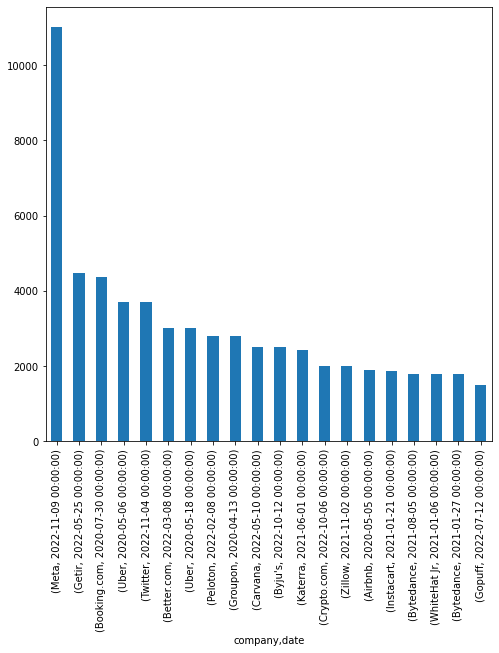

In [55]:
df1.groupby(['company','date'])['total_laid_off'].sum().sort_values(ascending=False).head(20).plot( kind='bar', stacked=True, figsize=(8,8))
